<a href="https://colab.research.google.com/github/jojosam90/ocr2/blob/main/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install torchvision torchaudio
#!pip install easyocr

In [5]:
#https://learnopencv.com/optical-character-recognition-using-paddleocr/

import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [38]:
#IMAGE_PATH = '/content/ocr/cleaned.png'
IMAGE_PATH = '/content/ocr/ocr3.jpeg'

In [39]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(IMAGE_PATH)
result

[([[23, 20], [348, 20], [348, 120], [23, 120]],
  'B8020UY1',
  0.24625353483666448),
 ([[84, 114], [270, 114], [270, 210], [84, 210]], '03/22', 0.9972196950216105)]

In [40]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font= cv2.FONT_HERSHEY_SIMPLEX

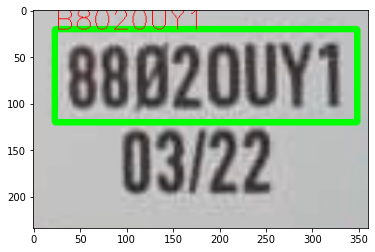

In [41]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right,(0,255,0),5)
#img = cv2.putText(img,text,top_left,font,1,[255,0,0],cv2.LINE_AA)
img = cv2.putText(img,text,top_left,font,1,[255,0,0],1)
plt.imshow(img)                  

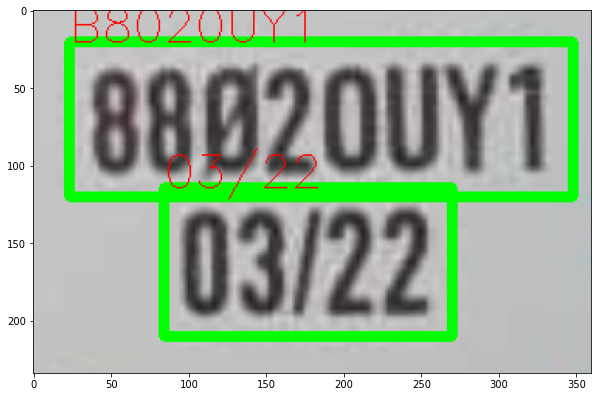

In [42]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]]) 
    text = detection[1]
    font= cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right,(0,255,0),5)
    img = cv2.putText(img,text,top_left,font,1,[255,0,0],1)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()